In [2]:
from transformers import ViTForImageClassification, ViTFeatureExtractor
from PIL import Image
import torch

# Loading in Model
device = "cuda" if torch.cuda.is_available() else "cpu"
model = ViTForImageClassification.from_pretrained( "imjeffhi/pokemon_classifier").to(device)
feature_extractor = ViTFeatureExtractor.from_pretrained('imjeffhi/pokemon_classifier')

# Caling the model on a test image
img = Image.open(r'C:/Users/Owner/OneDrive - 계명대학교/DC/2024/2024_개인/포켓몬_객체_탐지/다운로드.jpeg')
extracted = feature_extractor(images=img, return_tensors='pt').to(device)
predicted_id = model(**extracted).logits.argmax(-1).item()
predicted_pokemon = model.config.id2label[predicted_id]


In [3]:
predicted_pokemon

'Ditto'

In [7]:
import pandas as pd

df = pd.read_csv(r'C:/Users/Owner/OneDrive - 계명대학교/DC/2024/2024_개인/포켓몬_객체_탐지/Pokemon.csv')

In [9]:
def show_rows_by_value(df, column, value):
    result = df[df[column] == value]
    return result

In [10]:
value_to_find = predicted_pokemon
column_to_search = 'Name'

# 결과 출력
result = show_rows_by_value(df, column_to_search, value_to_find)

In [11]:
result

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
143,132,Ditto,Normal,NaN,288,48,48,48,48,48,48,1,False


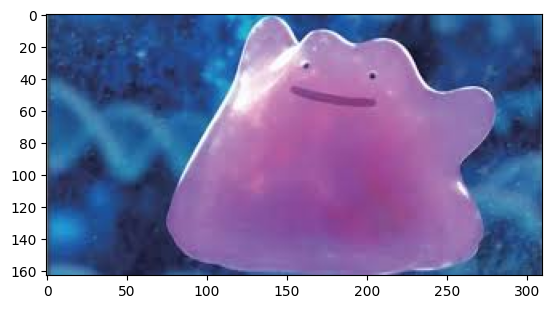

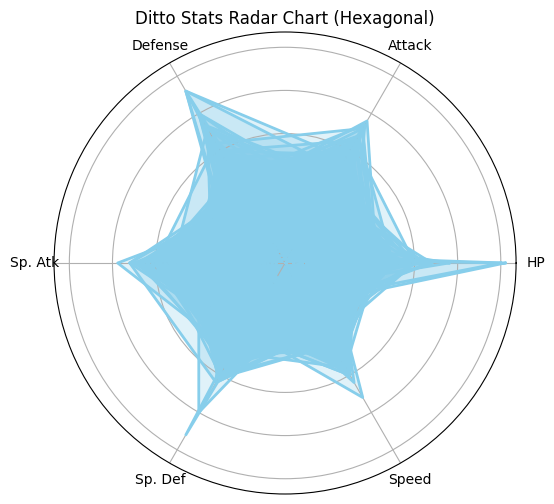